# Evaluation metrics
The main evaluation metrics for **classification** are
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC curve (AUC)
- Log loss
- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)

The main evaluation metrics for **regression** are
- Mean absolute error (MAE)
- Mean squared error (MSE)
- Root mean squared error (RMSE)
- Root mean squared logarithmic error (RMSLE)
- Mean percentage error (MPE)
- Mean absolute percentage error (MAPE)
- R-squared ($R^2$)

## Classification metrics

The 4 possible outcomes intersecting predictions and ground-truths in a binary classification problem
- True Positives (TP)
- True Negatives (TN)
- False Positives (FP)
- False Negatives (FN)

### Accuracy
Accuracy defines how accurate your model is, which means how many predictions where correct over the whole dataset.
$$\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN}$$

In [37]:
from sklearn.metrics import accuracy_score

y_true = [1,1,1,1,1,0,0,0,0,1]
y_pred = [1,1,1,1,1,1,1,0,0,0]

accuracy_score(y_true,y_pred)

0.7

$$TP=5 \quad TN=2 \quad FP=2 \quad FN=1$$
$$\text{Accuracy}=\frac{TP+TN}{TP+TN+FP+FN}=\frac{5+3}{5+3+2+1}=0.7$$

The main problem of accuracy is that, if the dataset is heavily imbalanced, the model might completely ignore the minority class, and keep obtaining an high accuracy value. That's generally a bad outcome, since the minority class usually is the "interesting" one, that is the one the user would like to correctly classify.

In [3]:
from sklearn.metrics import accuracy_score

y_true = [1,1,1,1,1,1,1,1,1,0]
y_pred = [1,1,1,1,1,1,1,1,1,1]

accuracy_score(y_true,y_pred)

0.9

### Precision
Precision represents the ability of the classifier not to label as positive a sample that is negative.
$$\text{Precision}=\frac{TP}{TP+FP}$$

In case of a **binary classification**, one class is considered "positive" and the precision is computed only for this class. That's the default behaviour of scikit-learn.

In [72]:
from sklearn.metrics import precision_score

y_true = [1,1,1,1,1,0,0,0,0,1]
y_pred = [1,1,1,1,1,1,1,0,0,0]

precision_score(y_true, y_pred, pos_label=1, average='binary')

0.7142857142857143

$$TP=5 \quad TN=2 \quad FP=2 \quad FN=1$$
$$\text{Precision}=\frac{TP}{TP+FP}=\frac{5}{5+2}=0.71$$

In case of a **multiclass classification**, different approaches are possible:
- micro averaged precision
- macro averaged precision
- weighted averaged precision

#### Micro averaged precision
Micro averaged precision is calculated considering the overall TP and TN, summing together TP and TN of each class

In [40]:
from sklearn.metrics import precision_score

y_true = [2,1,1,1,0,0,0,0,0,1]
y_pred = [2,2,1,1,1,1,1,0,0,0]

precision_score(y_true, y_pred, average='micro')

0.5

$$TP_{2}=1 \quad FP_{2}=1$$
$$TP_{1}=2 \quad FP_{1}=3$$
$$TP_{0}=2 \quad FP_{0}=1$$

$$TP=TP_{2}+TP_{1}+TP_{0}=1+2+2=5$$
$$FP=FP_{2}+FP_{1}+FP_{0}=1+3+1=5$$
$$\text{Precision}=\frac{TP}{TP+FP}=\frac{5}{5+5}=0.5$$

#### Macro averaged precision
Macro averaged precision is calculated computing the precision for each class, and then averaging the precisions

In [41]:
from sklearn.metrics import precision_score

y_true = [2,1,1,1,0,0,0,0,0,1]
y_pred = [2,2,1,1,1,1,1,0,0,0]

precision_score(y_true, y_pred, average='macro')

0.5222222222222223

$$N_{classes}=3$$

$$TP_{2}=1 \quad FP_{2}=1$$
$$TP_{1}=2 \quad FP_{1}=3$$
$$TP_{0}=2 \quad FP_{0}=1$$

$$\text{Precision}_{2}=\frac{TP_{2}}{TP_{2}+FP_{2}}=\frac{1}{1+1}=\frac{1}{2}$$
$$\text{Precision}_{1}=\frac{TP_{1}}{TP_{1}+FP_{1}}=\frac{2}{2+3}=\frac{2}{5}$$
$$\text{Precision}_{0}=\frac{TP_{0}}{TP_{0}+FP_{0}}=\frac{2}{2+1}=\frac{2}{3}$$

$$\text{Precision}=\frac{\text{Precision}_{2}+\text{Precision}_{1}+\text{Precision}_{0}}{N_{classes}}=\frac{\frac{1}{2}+\frac{2}{5}+\frac{2}{3}}{3}=0.522$$

#### Weighted averaged precision
Weighted averaged precision is calculated computing the precision for each class (as macro averaged precision), and then computing a weighted average of the precisions

In [45]:
from sklearn.metrics import precision_score

y_true = [2,1,1,1,0,0,0,0,0,1]
y_pred = [2,2,1,1,1,1,1,0,0,0]

precision_score(y_true, y_pred, average='weighted')

0.5433333333333333

$$N_{samples}=10$$
$$N_{2}=1 \quad w_{2}=N_{2}/N_{samples}=1/10$$
$$N_{1}=4 \quad w_{1}=N_{1}/N_{samples}=4/10$$
$$N_{0}=5 \quad w_{0}=N_{0}/N_{samples}=5/10$$

$$TP_{2}=1 \quad FP_{2}=1$$
$$TP_{1}=2 \quad FP_{1}=3$$
$$TP_{0}=2 \quad FP_{0}=1$$

$$\text{Precision}_{2}=\frac{TP_{2}}{TP_{2}+FP_{2}}=\frac{1}{1+1}=\frac{1}{2}$$
$$\text{Precision}_{1}=\frac{TP_{1}}{TP_{1}+FP_{1}}=\frac{2}{2+3}=\frac{2}{5}$$
$$\text{Precision}_{0}=\frac{TP_{0}}{TP_{0}+FP_{0}}=\frac{2}{2+1}=\frac{2}{3}$$

$$\text{Precision}=w_{2}*\text{Precision}_{2}+w_{1}*\text{Precision}_{1}+w_{0}*\text{Precision}_{0}=\frac{1}{10}*\frac{1}{2}+\frac{4}{10}*\frac{2}{5}+\frac{5}{10}*\frac{2}{3}=0.543$$

### Recall
Recall represents the ability of the classifier to find all the positive samples.
$$\text{Recall}=\frac{TP}{TP+FN}$$

In case of a binary classification, one class is considered "positive" and the recall is computed only for this class. That's the default behaviour of scikit-learn.

In [71]:
from sklearn.metrics import recall_score

y_true = [1,1,1,1,1,0,0,0,0,1]
y_pred = [1,1,1,1,1,1,1,0,0,0]

recall_score(y_true, y_pred, pos_label=1, average='binary')

0.8333333333333334

$$TP=5 \quad TN=2 \quad FP=2 \quad FN=1$$
$$\text{Recall}=\frac{TP}{TP+FN}=\frac{5}{5+1}=0.83$$

In case of a **multiclass classification**, different approaches are possible:
- micro averaged recall
- macro averaged recall
- weighted averaged recall

#### Micro averaged recall
Micro averaged recall is calculated considering the overall TP and FN, summing together TP and TN of each class

In [51]:
from sklearn.metrics import recall_score

y_true = [2,1,1,1,0,0,0,0,0,1]
y_pred = [2,2,1,1,1,1,1,0,0,0]

recall_score(y_true, y_pred, average='micro')

0.5

$$TP_{2}=1 \quad FN_{2}=0$$
$$TP_{1}=2 \quad FN_{1}=2$$
$$TP_{0}=2 \quad FN_{0}=3$$

$$TP=TP_{2}+TP_{1}+TP_{0}=1+2+2=5$$
$$FN=FN_{2}+FN_{1}+FN_{0}=0+2+3=5$$
$$\text{Recall}=\frac{TP}{TP+FN}=\frac{5}{5+5}=0.5$$

#### Macro averaged recall
Macro averaged recall is calculated computing the recall for each class, and then averaging the recalls

In [52]:
from sklearn.metrics import recall_score

y_true = [2,1,1,1,0,0,0,0,0,1]
y_pred = [2,2,1,1,1,1,1,0,0,0]

recall_score(y_true, y_pred, average='macro')

0.6333333333333333

$$N_{classes}=3$$

$$TP_{2}=1 \quad FN_{2}=0$$
$$TP_{1}=2 \quad FN_{1}=2$$
$$TP_{0}=2 \quad FN_{0}=3$$

$$\text{Recall}_{2}=\frac{TP_{2}}{TP_{2}+FN_{2}}=\frac{1}{1+0}=\frac{1}{1}$$
$$\text{Recall}_{1}=\frac{TP_{1}}{TP_{1}+FN_{1}}=\frac{2}{2+2}=\frac{2}{4}$$
$$\text{Recall}_{0}=\frac{TP_{0}}{TP_{0}+FN_{0}}=\frac{2}{2+3}=\frac{2}{5}$$

$$\text{Recall}=\frac{\text{Recall}_{2}+\text{Recall}_{1}+\text{Recall}_{0}}{N_{classes}}=\frac{\frac{1}{1}+\frac{2}{4}+\frac{2}{5}}{3}=0.633$$

#### Weighted averaged recall
Weighted averaged recall is calculated computing the recall for each class (as macro averaged recall), and then computing a weighted average of the recalls

In [54]:
from sklearn.metrics import recall_score

y_true = [2,1,1,1,0,0,0,0,0,1]
y_pred = [2,2,1,1,1,1,1,0,0,0]

recall_score(y_true, y_pred, average='weighted')

0.5

$$N_{samples}=10$$
$$N_{2}=1 \quad w_{2}=N_{2}/N_{samples}=1/10$$
$$N_{1}=4 \quad w_{1}=N_{1}/N_{samples}=4/10$$
$$N_{0}=5 \quad w_{0}=N_{0}/N_{samples}=5/10$$

$$TP_{2}=1 \quad FN_{2}=0$$
$$TP_{1}=2 \quad FN_{1}=2$$
$$TP_{0}=2 \quad FN_{0}=3$$

$$\text{Recall}_{2}=\frac{TP_{2}}{TP_{2}+FN_{2}}=\frac{1}{1+0}=\frac{1}{1}$$
$$\text{Recall}_{1}=\frac{TP_{1}}{TP_{1}+FN_{1}}=\frac{2}{2+2}=\frac{2}{4}$$
$$\text{Recall}_{0}=\frac{TP_{0}}{TP_{0}+FN_{0}}=\frac{2}{2+3}=\frac{2}{5}$$

$$\text{Recall}=w_{2}*\text{Recall}_{2}+w_{1}*\text{Recall}_{1}+w_{0}*\text{Recall}_{0}=\frac{1}{10}*\frac{1}{1}+\frac{4}{10}*\frac{2}{4}+\frac{5}{10}*\frac{2}{5}=0.5$$

### Precision-recall curve
Most of the models, for each data point, do not actually predict a class, rather they predict a probability of belonging to a class. It's up to the user to decide the probability threshold based on which a data point is considered part of a class or not. Then, given a threshold, precision and recall will accordingly change. At this point it is useful to visualize how they change based on different thresholds: the precision-recall value pairs obtained changing the threshold is called precision-recall curve.

In [66]:
from sklearn.metrics import precision_recall_curve

y_true = [1,1,1,1,0,0,0,0,0,1]
y_pred_prob = [.6,.7,.8,.9,.7,.6,.5,.2,.1,.3]

precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_prob)

print(precisions)
print(recalls)
print(thresholds)

[0.625      0.57142857 0.66666667 0.75       1.         1.
 1.        ]
[1.  0.8 0.8 0.6 0.4 0.2 0. ]
[0.3 0.5 0.6 0.7 0.8 0.9]


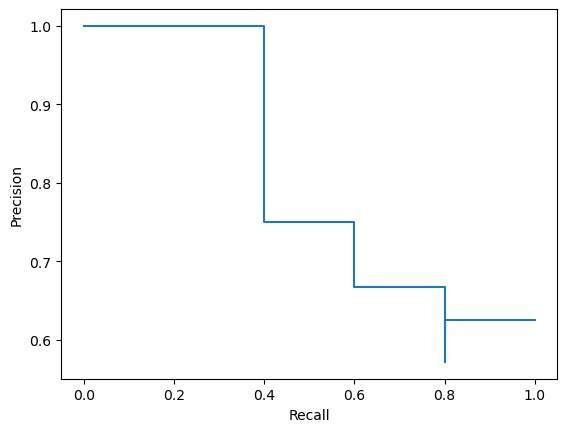

In [67]:
from sklearn.metrics import PrecisionRecallDisplay

pr_display = PrecisionRecallDisplay(precisions,recalls).plot()

These plots show the trade-off between precision and recall: maximizing one means minimizing the other.

### F1 score
Since a trade-off between precision and recall must be found, a compound metric come into help, that is the F1 score. The F1 score is defined as a weighted average (in particular, a **harmonic mean**) between precision and recall.
$$\text{F1}=\frac{2*\text{Precision}*\text{Recall}}{\text{Precision}+\text{Recall}}=\frac{2*TP}{2*TP+FP+FN}$$

In case of a **binary classification**, one class is considered "positive" and the precision is computed only for this class. That's the default behaviour of scikit-learn.

In [73]:
from sklearn.metrics import f1_score

y_true = [1,1,1,1,1,0,0,0,0,1]
y_pred = [1,1,1,1,1,1,1,0,0,0]

f1_score(y_true, y_pred)

0.7692307692307692

$$TP=5 \quad TN=2 \quad FP=2 \quad FN=1$$
$$\text{Precision}=\frac{TP}{TP+FP}=\frac{5}{5+2}=0.71$$
$$\text{Recall}=\frac{TP}{TP+FN}=\frac{5}{5+1}=0.83$$
$$\text{F1}=\frac{2*\text{Precision}*\text{Recall}}{\text{Precision}+\text{Recall}}=\frac{2*0.71*0.83}{0.71+0.83}=0.76$$

In case of a **multiclass classification**, different approaches are possible:
- micro averaged f1 score
- macro averaged f1 score
- weighted averaged f1 score

These methods follow what said concerning the analogous precision and recall approaches.

### ROC curve and AUC
- **True positive rate** (TPR): sensitivity; same as recall
- **False positive rate** (FPR): type I error rate. In terms of the courtroom example, a type I error corresponds to convicting an innocent defendant, i.e. considering him guilty (positive) insted of innocent (the default, negative).
- **True negative rate** (TNR): specificity
- **False negative rate** (FPR): type II error rate. In terms of the courtroom example, a type II error corresponds to acquitting a criminal, i.e. considering him innocent (the default, negative) insted of guilty (positive).

Similarly to what's done with the precision-recall curve, it is interesting to compute the **Receiver Operating Characteristic** (ROC), that is composed of value-pairs of TPR and FPR considering different values for the threshold.

In [97]:
from sklearn.metrics import roc_curve

y_true = [1,1,1,1,0,0,0,0,0,1]
y_pred_prob = [.6,.7,.8,.9,.7,.6,.5,.2,.1,.3]

fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_pred_prob,pos_label=1)

print(tpr)
print(fpr)
print(thresholds)

[0.  0.2 0.4 0.8 0.8 1.  1. ]
[0.  0.  0.  0.4 0.6 0.6 1. ]
[1.9 0.9 0.8 0.6 0.5 0.3 0.1]


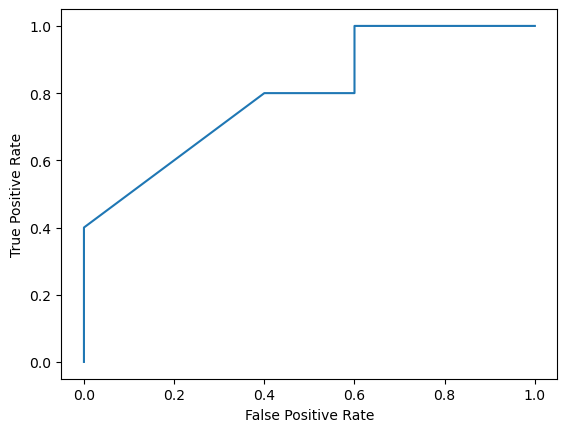

In [98]:
from sklearn.metrics import RocCurveDisplay

pr_display = RocCurveDisplay(tpr=tpr,fpr=fpr).plot()

Looking at the example plot, the best threshold seems to be $0.6$: it corresponds to a good trade-off between the TPR maximization ($TPR=0.8$) and the FPR minimization ($FPR=0.4$).

This curve is very informative: if the curve lies below the diagonal, it means that the values predicted by the estimator are worse than they would be if they were randomly drawn from a uniform distribution.

A metric that more concisely hints the same information is the **Area Under the Curve** (AUC). Indeed, if the area below the curve is less than 0.5, then the predicted values are worse than they would be if they were randomly drawn from a uniform distribution. 

In [99]:
from sklearn.metrics import roc_auc_score

y_true = [1,1,1,1,0,0,0,0,0,1]
y_pred_prob = [.6,.7,.8,.9,.7,.6,.5,.2,.1,.3]

auc = roc_auc_score(y_true, y_pred_prob)

print(auc)

0.8
